IMPORTING LIBRARIES

In [1]:
import tensorflow as tf

C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\tensorflow\python\framework

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


# PART-1 Building the CNN

In [3]:
#Initializing the CNN.
classifier= Sequential()

In [4]:
#Step-1 Convolution+ Pooling layer
classifier.add(Convolution2D(32,(3,3),input_shape=(48,48,3), activation='relu'))   #32 feature maps
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
#Adding a second convolution layer+ pooling layer
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
#Step-3 Flattening
classifier.add(Flatten())
classifier.add(Dropout(0.5))

In [7]:
#Step-4 Full Connection
classifier.add(Dense(output_dim = 50,activation = 'relu'))


C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
  from ipykernel import kernelapp as app


In [8]:
#Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [9]:
#compiling the CNN
#We are using Adaptive Moment Estimation Optimizer
optimizer=Adam(lr=1e-3)
classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

SPLITTING THE DATASET INTO TRAINING AND VALIDATION

In [10]:
import splitfolders
splitfolders.ratio("data", output="mask", seed=1337, ratio=(.75,.25),group_prefix=None)

Copying files: 7553 files [03:37, 34.73 files/s]


# Part2- Fitting the CNN to the images

The keras deep learning library provides utilities for working with image data. The main API is ImageDataGenerator class that combines data loading, preparation and augmentation.

In [11]:
#Image Augmentation
from keras.preprocessing.image import ImageDataGenerator

#Applying these transformations on each training image as it is passed to the model
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



In [12]:
#flow_from_directory() method identifies the classes from the folder name
training_set = train_datagen.flow_from_directory('mask_dataset/train',
                                                 target_size=(48, 48),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 5664 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory( 'mask_dataset/val',
        target_size=(48,48),
        batch_size=32,
        class_mode='binary')


Found 1889 images belonging to 2 classes.


In [14]:
epochs=15
from keras.callbacks import ModelCheckpoint

#Saving weights
checkpoint = ModelCheckpoint("weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#fit_generator() is used when we have a large dataset or image augmentation is applied
hist=classifier.fit_generator(training_set,
        epochs=epochs,
        validation_data=test_set,
        callbacks=callbacks_list)

Epoch 1/15
168/177 [===========================>..] - ETA: 5s - loss: 0.4046 - acc: 0.8086

C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


177/177 [==============================] - 139s 788ms/step - loss: 0.3970 - acc: 0.8143 - val_loss: 0.2574 - val_acc: 0.8962

Epoch 00001: val_acc improved from -inf to 0.89624, saving model to weights.h5
Epoch 2/15
177/177 [==============================] - 29s 162ms/step - loss: 0.2906 - acc: 0.8817 - val_loss: 0.2336 - val_acc: 0.9058

Epoch 00002: val_acc improved from 0.89624 to 0.90577, saving model to weights.h5
Epoch 3/15
177/177 [==============================] - 28s 161ms/step - loss: 0.2527 - acc: 0.9017 - val_loss: 0.1996 - val_acc: 0.9127

Epoch 00003: val_acc improved from 0.90577 to 0.91265, saving model to weights.h5
Epoch 4/15
177/177 [==============================] - 29s 164ms/step - loss: 0.2299 - acc: 0.9105 - val_loss: 0.1917 - val_acc: 0.9222

Epoch 00004: val_acc improved from 0.91265 to 0.92218, saving model to weights.h5
Epoch 5/15
177/177 [==============================] - 29s 163ms/step - loss: 0.2088 - acc: 0.9158 - val_loss: 0.1733 - val_acc: 0.9285

Epoch

In [15]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                160050    
__________

# Saving the model

In [16]:
#Save the model
#Serialize model to JSON
model_json = classifier.to_json()
with open("model.json","w")as json_file:
    json_file.write(model_json)


# PLOTTING ACCURACY AND LOSS GRAPH

In [17]:
import matplotlib.pyplot as plt
# Use Matplotlib in jupyter
%matplotlib inline

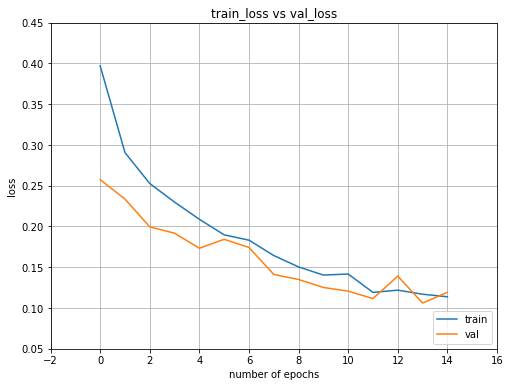

In [18]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(15)

plt.figure(1,figsize=(8,6))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])


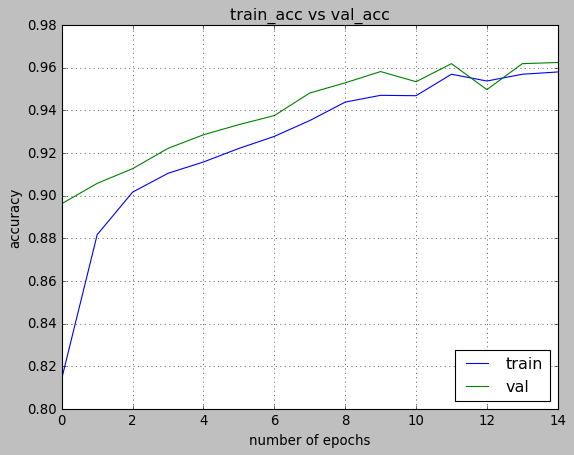

In [19]:
plt.figure(2,figsize=(8,6))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

# Making a single prediction

In [20]:
import numpy as np
from keras.preprocessing import image

#load_img() function is used for loading an image from file as a Python Imaging Library or PIL image object
test_image=image.load_img('final_pred/index.jpg',target_size=(48,48))

#the img_to_array() function is used for converting a loaded image in PIL format into a NumPy array
test_image=image.img_to_array(test_image)

#The predict method of the classifier expect 4 dimensions so we will add it using expand_dims() and the 4th dim is the batch
test_image=np.expand_dims(test_image,axis=0)
#axis specify the position where we want to add the dimension

result=classifier.predict(test_image)

In [21]:
#for mapping
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [22]:
if result[0][0]==1:
    prediction='Without_mask'
else:
    prediction='with mask'

In [24]:
print(prediction)

with mask
